In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\Stroke-Risk-Prediction-using-Machine-Learning-master\Stroke-Risk-Prediction-using-Machine-Learning-master\dataset\healthcare-dataset-stroke-data.csv")

In [3]:
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.shape

(5110, 12)

 # EXPLORATORY DATA ANALYSIS


In [6]:
# in above data id column is not required
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# find if data has null values
data.isnull().sum()
# we got 201 null values in bmi(body mass index)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# now we have to handle those missing values
# we have to fill it up by mean, mode or its upper or lower values or we can remove those values(those rows)

In [9]:
# we will fill null values coz its not good to remove 201 rows as it may effect our model's accuracy

data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [10]:
data['bmi'].describe()

# we can fill it with mean or median since both are very close in value

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
 data['bmi'].fillna(value=data['bmi'].mean(),inplace=True)
data['bmi'].isnull().sum()  # we have filleid missing values

0

In [12]:
# feature generation is not required coz we have enough features to train and predict model
# feature selection is required coz in dataset all the given features doesnot make sense in predicting and training
# we r gonna drop id feature coz its off no use 

data.drop('id',axis=1,inplace=True)


In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# OUTLIER REMOVAL


<AxesSubplot:>

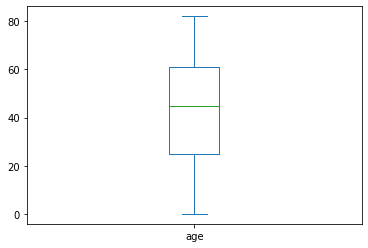

In [14]:
data['age'].plot(kind='box')


In [15]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:>

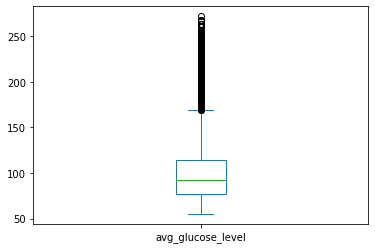

In [16]:
data['avg_glucose_level'].plot(kind='box')

In [17]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [18]:
data[data['avg_glucose_level']>114]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [19]:
# as we see 1282 rows have outliers, so we cant delete it, coz majority of data has outliers
# we dont alter outliers coz of that outlier a person may get stroke

<AxesSubplot:>

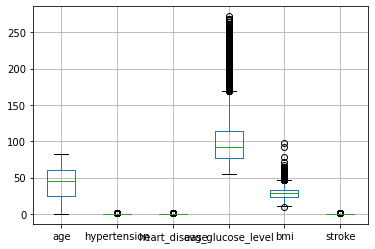

In [20]:
data.boxplot()

<AxesSubplot:>

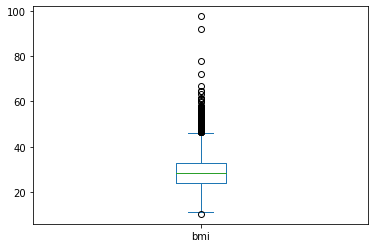

In [21]:
data['bmi'].plot(kind='box')

In [22]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [23]:
data[data['bmi']>32.8]
# same goes for bmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
18,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5087,Female,63.0,0,0,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,0
5092,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5097,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0


# ENCODING CATEGORICAL DATA

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
s=oe.fit_transform(data[['smoking_status']])
data['smoking_status']=s
e=oe.fit_transform(data[['ever_married']])
w=oe.fit_transform(data[['work_type']])
r=oe.fit_transform(data[['Residence_type']])
data['Residence_type']=r
data['work_type']=w
data['ever_married']=e
ge=oe.fit_transform(data[['gender']])
data['gender']=ge
#del data['Other']
data.head(21)
#data['smoking_status'].unique()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.000000,1.0,1
6,1.0,74.0,1,1,1.0,2.0,0.0,70.09,27.400000,2.0,1
7,0.0,69.0,0,0,0.0,2.0,1.0,94.39,22.800000,2.0,1
8,0.0,59.0,0,0,1.0,2.0,0.0,76.15,28.893237,0.0,1
9,0.0,78.0,0,0,1.0,2.0,1.0,58.57,24.200000,0.0,1


In [25]:
data.info()

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 439.3 KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0,1


# PARTITIONING

In [26]:
# Splitting data for train and test
# x = features (input data)
# y = output column
# we give some data to training and rest for testing and same goes for y also


In [27]:
x=data.drop('stroke',axis=1)
y=data['stroke']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)


In [29]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1.0,49.0,0,0,1.0,2.0,0.0,79.64,28.893237,3.0
4733,1.0,67.0,0,0,1.0,2.0,0.0,83.16,25.500000,1.0
3905,1.0,78.0,0,0,1.0,2.0,1.0,208.85,24.400000,1.0
4700,1.0,47.0,0,0,1.0,2.0,0.0,110.14,30.500000,3.0
4939,0.0,59.0,0,0,1.0,2.0,1.0,71.08,28.100000,2.0


In [30]:
y_train.head(20)

2285    0
4733    0
3905    0
4700    0
4939    0
2078    0
3317    0
2702    0
1285    0
2143    0
2775    0
4421    0
1893    0
1961    0
2374    0
1863    0
3206    0
4693    0
3937    0
253     0
Name: stroke, dtype: int64

# NORMALISATION

In [31]:
# we will scale down the values between 0 and 1, so that it will be helpful to train our model

from sklearn.preprocessing import StandardScaler
std=StandardScaler()

data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [32]:
x_train_transformed=std.fit_transform(x_train)
x_test_transformed=std.transform(x_test)

# we will not scale y value bcoz it has only 0's and 1's

In [33]:
x_train_transformed

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

# MODEL TRAINING

In [34]:
# we cant decide one particular algo is perfect for the given problem
# we have to try with all algo and choose the best among them which works better for the given problem

In [35]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
# feature importance explains which column is important acc dt algo
dt.feature_importances_

array([0.02404655, 0.17182053, 0.01618884, 0.02344403, 0.02761565,
       0.05937951, 0.04505498, 0.30822962, 0.270118  , 0.05410228])

In [37]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [38]:
d=dt.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
d_a=accuracy_score(y_test,d)
print(d_a)
# accuracy is 90%

0.9041095890410958


In [40]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [41]:
lr.fit(x_train_transformed,y_train)

LogisticRegression()

In [42]:
y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: stroke, Length: 1022, dtype: int64

In [43]:
l=lr.predict(x_test_transformed)
l_a=accuracy_score(y_test,l)
print(l_a)
# accuracy is 93.8%

0.9383561643835616


In [44]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()
knn.fit(x_train_transformed,y_train)
k=knn.predict(x_test_transformed)
k_a=accuracy_score(y_test,k)
print(k_a)

0.9344422700587084


In [45]:
# RANDOM FOREST - it is a forest which consists of many dt's


from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_transformed,y_train)

RandomForestClassifier()

In [46]:
r=rf.predict(x_test_transformed)
r_a=accuracy_score(y_test,r)
print(r_a)

0.9373776908023483


In [47]:
# SVM

from sklearn.svm import SVC
sv=SVC()# SVM



In [48]:
sv.fit(x_train_transformed,y_train)

SVC()

In [49]:
s=sv.predict(x_test_transformed)

In [50]:
s_a=accuracy_score(y_test,s)
print(s_a)

0.9393346379647749


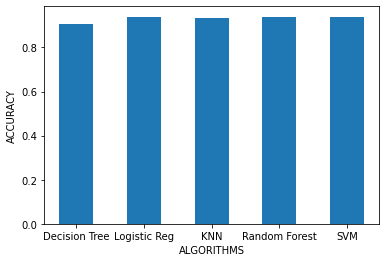

In [51]:
import matplotlib.pyplot as pt
pt.bar(['Decision Tree','Logistic Reg','KNN','Random Forest','SVM'],[d_a,l_a,k_a,r_a,s_a],width=0.5)
pt.xlabel("ALGORITHMS")
pt.ylabel("ACCURACY")
pt.show()

In [52]:
import pickle
import os
import joblib

scaler_path=os.path.join(r'C:\Users\prajw\campusx_ml\resume_project_ml','models/scaler.pkl')

with open(scaler_path,'wb') as scaler_file:  #wb =write binary
    pickle.dump(std,scaler_file)

In [53]:
model_path=os.path.join(r'C:\Users\prajw\campusx_ml\resume_project_ml','models/sv.sav')


joblib.dump(sv,model_path)

['C:\\Users\\prajw\\campusx_ml\\resume_project_ml\\models/sv.sav']

In [54]:
dummy=os.path.join(r'C:\Users\prajw\campusx_ml\resume_project_ml','models/rf.sav')
joblib.dump(rf,dummy)

['C:\\Users\\prajw\\campusx_ml\\resume_project_ml\\models/rf.sav']

In [55]:
data['stroke'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64>